# Getting Started with Transfer Learning

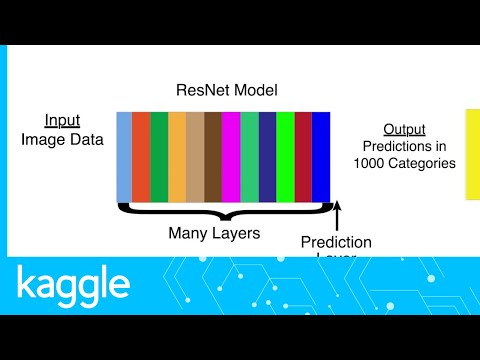

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('mPFq5KMxKVw', width=800, height=450)


# Beginner's intro to Malaria

![Malaria_cycle](https://i1.wp.com/www.malariasite.com/wp-content/uploads/2015/02/EID_lec17_slide8-large.jpg?resize=799%2C664&ssl=1)

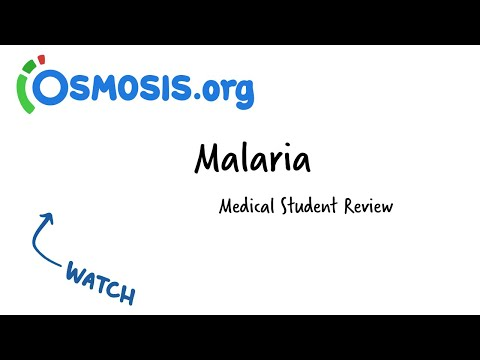

In [2]:
YouTubeVideo('3_2TnCqBFcY', width=800, height=450)

# Importing Prerequisite Libraries

# Loading Libraries

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2, VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
import time
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import cross_validate, train_test_split
import matplotlib.pyplot as plt
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Image Augmentation

In [4]:
data_generator = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.20)
#valid_data_generator = ImageDataGenerator(rescale=1.0/255.0)

In [5]:
train_generator = data_generator.flow_from_directory(directory= '../input/cell-images-for-detecting-malaria/cell_images/cell_images' ,             
                                                     target_size=(128, 128),
                                                     class_mode='binary',
                                                     subset='training',
                                                           shuffle=True,
                                                     batch_size=64
                                 )

valid_generator = data_generator.flow_from_directory(directory= '../input/cell-images-for-detecting-malaria/cell_images/cell_images',             
                                                     target_size=(128, 128),
                                                     class_mode='binary',
                                                           shuffle = True,
                                                     subset='validation',
                                                     batch_size=64,
                                                    
                                                     )


classes = ['Parasitized', 'Uninfected']

Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


# Displaying The Images

In [6]:
sample_training_images, train_label = next(train_generator)

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout() 
    plt.show()

Random Display of Cell images


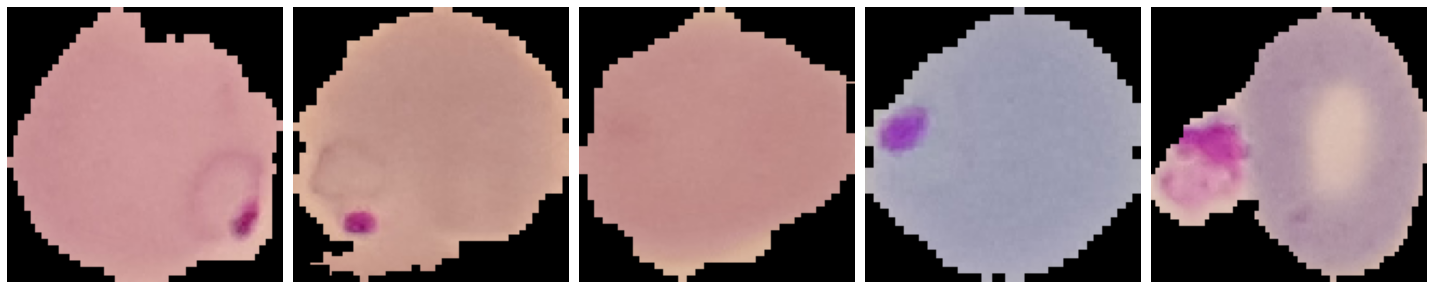

In [8]:
print('Random Display of Cell images')
plotImages(sample_training_images[:5])


# MobileNet Model Developement

***Here I will be using MobileNetV2 architecture below I will be showing architecture of different MobileNet models***

![mobilenet](https://miro.medium.com/max/1882/1*bqE59FvgpvoAQUMQ0WEoUA.png)

In [9]:
model = Sequential()
model.add(MobileNetV2(include_top=False, pooling='avg', weights='imagenet', input_shape=(128, 128, 3), classes=2))
model.add(Dense(1, activation='sigmoid'))
model.layers[0].trainable = False
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [10]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [11]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = len(train_generator),
                              epochs=20,
                              validation_steps = len(valid_generator),
                              validation_data=valid_generator,
                              callbacks = [early_stop]
                              )

Epoch 1/20
345/345 [==============================] - 81s 234ms/step - loss: 0.3122 - accuracy: 0.8707 - val_loss: 0.2435 - val_accuracy: 0.9029
Epoch 2/20
345/345 [==============================] - 43s 126ms/step - loss: 0.2120 - accuracy: 0.9233 - val_loss: 0.2202 - val_accuracy: 0.9171
Epoch 3/20
345/345 [==============================] - 43s 124ms/step - loss: 0.1920 - accuracy: 0.9314 - val_loss: 0.2075 - val_accuracy: 0.9221
Epoch 4/20
345/345 [==============================] - 42s 123ms/step - loss: 0.1810 - accuracy: 0.9357 - val_loss: 0.2112 - val_accuracy: 0.9227
Epoch 5/20
345/345 [==============================] - 44s 128ms/step - loss: 0.1753 - accuracy: 0.9384 - val_loss: 0.2027 - val_accuracy: 0.9274
Epoch 6/20
345/345 [==============================] - 43s 126ms/step - loss: 0.1689 - accuracy: 0.9410 - val_loss: 0.2034 - val_accuracy: 0.9225
Epoch 7/20
345/345 [==============================] - 43s 123ms/step - loss: 0.1638 - accuracy: 0.9432 - val_loss: 0.1991 - val_ac

# Model metrics plot

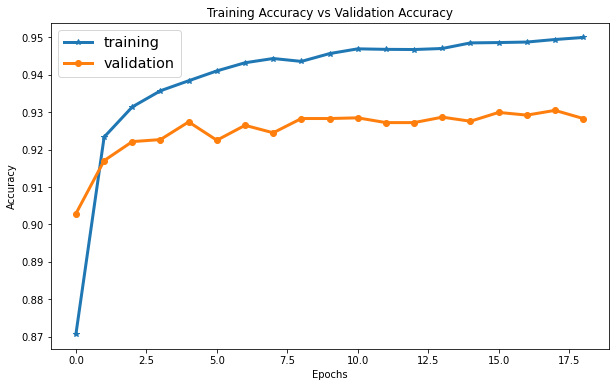

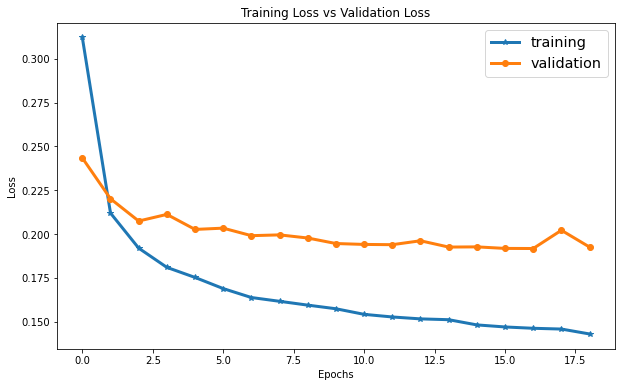

In [12]:
def visualize_training(history, lw = 3):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['accuracy'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_accuracy'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Accuracy vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize = 'x-large')
    plt.show()

    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(history.history['val_loss'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Loss vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize = 'x-large')
    plt.show()
visualize_training(history)

# Predictions

In [13]:
label = valid_generator.classes
pred= model.predict(valid_generator)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (valid_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]

# Save Model

In [14]:
model_name = 'malaria_predsmodel.h5'
model.save_weights(model_name)

# Random Image Prediction

In [15]:
image_path = '../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'
image = tf.keras.preprocessing.image.load_img(image_path)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
preds1 = model.predict_classes(input_arr)


In [16]:
preds1

array([[0]], dtype=int32)

**So our model correctly predicts the Parasitized cell**

In [17]:
image_path = '../input/cell-images-for-detecting-malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png'
image = tf.keras.preprocessing.image.load_img(image_path)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
pred_uninfected = model.predict_classes(input_arr)

In [18]:
pred_uninfected

array([[0]], dtype=int32)

# Confusion Matrix And Classification Report

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, mean_absolute_error

rc = roc_curve(predicted_class_indices,label)
cf_matrix = confusion_matrix(predicted_class_indices,label)
cf_report = classification_report(predicted_class_indices,label)
print('Confusion matrix report of the model : \n{}'.format(cf_matrix))

Confusion matrix report of the model : 
[[2755 2755]
 [   0    0]]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
print('Classification report of the model : \n{}'.format(cf_report))

Classification report of the model : 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67      5510
           1       0.00      0.00      0.00         0

    accuracy                           0.50      5510
   macro avg       0.50      0.25      0.33      5510
weighted avg       1.00      0.50      0.67      5510



In [21]:
print('ROC metrics estimates : \n{}'.format(rc))

ROC metrics estimates : 
(array([0. , 0.5, 1. ]), array([nan, nan, nan]), array([2, 1, 0], dtype=int32))


In [22]:
exp_series = pd.Series(label)
pred_series = pd.Series(predicted_class_indices)
pd.crosstab(exp_series, pred_series, rownames=['Actual'], colnames=['Predicted'],margins=True)

Predicted,0,All
Actual,,
0,2755,2755
1,2755,2755
All,5510,5510


# MobileNet MAE

In [23]:
mae = mean_absolute_error(predicted_class_indices,label)
print('Mean Absolute Error : {}'.format(mae))

Mean Absolute Error : 0.5


              precision    recall  f1-score   support

   Parasitic       1.00      0.50      0.67      5510
  uninfected       0.00      0.00      0.00         0

    accuracy                           0.50      5510
   macro avg       0.50      0.25      0.33      5510
weighted avg       1.00      0.50      0.67      5510



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


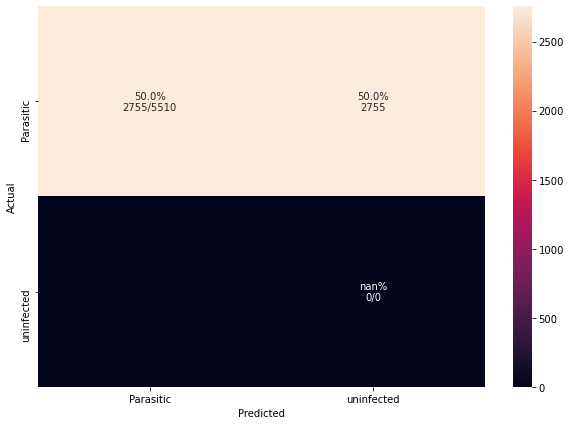

In [24]:
import seaborn as sns

matrix_index = ["Parasitic", "uninfected"]

preds = model.predict(valid_generator)
classpreds = np.argmax(preds, axis=1) # predicted classes 
#y_testclass = np.argmax(valida, axis=1) # true classes

cm = confusion_matrix(predicted_class_indices,label)
print(classification_report(predicted_class_indices,label, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix 
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=annot, fmt='')

# VGG-19

![vgg_architecture](https://www.researchgate.net/profile/Clifford_Yang/publication/325137356/figure/fig2/AS:670371271413777@1536840374533/llustration-of-the-network-architecture-of-VGG-19-model-conv-means-convolution-FC-means.jpg)

In [25]:
vgg_model = Sequential()
vgg_model.add(VGG19(include_top=False, pooling='avg', weights='imagenet', input_shape=(128, 128, 3), classes=2))
vgg_model.add(Flatten())
vgg_model.add(Dense(256,activation='relu'))
vgg_model.add(Dense(64,activation='relu'))
vgg_model.add(Dense(1,activation = 'sigmoid'))

vgg_model.layers[0].trainable = False
vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
vgg_model.summary()

80142336/80134624 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 512)               20024384  
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 20,172,225
Trainable params: 147,841
Non-trainable params: 20,024,384
_________________________________________________________________


In [26]:
vgg_history = vgg_model.fit_generator(train_generator,
                              steps_per_epoch = len(train_generator),
                              epochs=20,
                              validation_steps = len(valid_generator),
                              validation_data=valid_generator,
                              callbacks = [early_stop]
                                     )

Epoch 1/20
345/345 [==============================] - 46s 134ms/step - loss: 0.3164 - accuracy: 0.8650 - val_loss: 0.2714 - val_accuracy: 0.8893
Epoch 2/20
345/345 [==============================] - 47s 136ms/step - loss: 0.2224 - accuracy: 0.9116 - val_loss: 0.2372 - val_accuracy: 0.9083
Epoch 3/20
345/345 [==============================] - 47s 135ms/step - loss: 0.2022 - accuracy: 0.9231 - val_loss: 0.3190 - val_accuracy: 0.8613
Epoch 4/20
345/345 [==============================] - 46s 134ms/step - loss: 0.2008 - accuracy: 0.9224 - val_loss: 0.2207 - val_accuracy: 0.9116
Epoch 5/20
345/345 [==============================] - 46s 132ms/step - loss: 0.1932 - accuracy: 0.9247 - val_loss: 0.2297 - val_accuracy: 0.9096
Epoch 6/20
345/345 [==============================] - 47s 135ms/step - loss: 0.1866 - accuracy: 0.9266 - val_loss: 0.2615 - val_accuracy: 0.8989


# Save VGG model

In [27]:
vgg_model_name = 'vgg_malaria_predsmodel.h5'
model.save_weights(vgg_model_name)

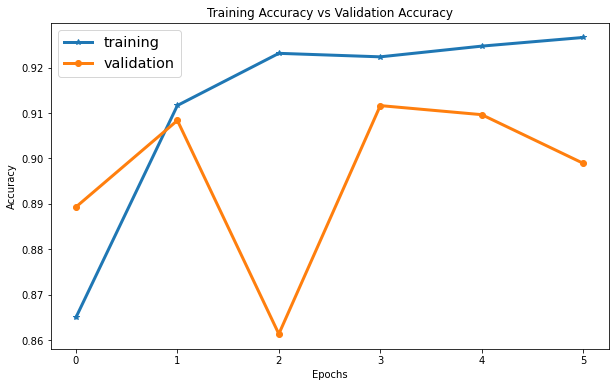

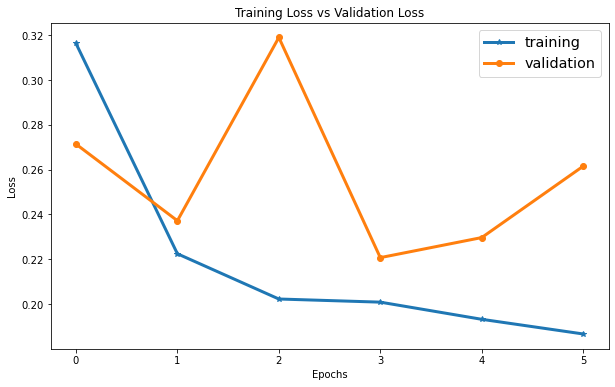

In [28]:
def visualize_training(vgg_history, lw = 3):
    plt.figure(figsize=(10,6))
    plt.plot(vgg_history.history['accuracy'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(vgg_history.history['val_accuracy'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Accuracy vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize = 'x-large')
    plt.show()

    plt.figure(figsize=(10,6))
    plt.plot(vgg_history.history['loss'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(vgg_history.history['val_loss'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Loss vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize = 'x-large')
    plt.show()
visualize_training(vgg_history)

# VGG-19 predictions

In [29]:
label = valid_generator.classes
pred= vgg_model.predict(valid_generator)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (valid_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
vgg_predictions = [labels2[k] for k in predicted_class_indices]

In [30]:
image_path = '../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'
image = tf.keras.preprocessing.image.load_img(image_path)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
preds1 = vgg_model.predict_classes(input_arr)


In [31]:
preds1

array([[0]], dtype=int32)

In [32]:
rc = roc_curve(predicted_class_indices,label)
cf_matrix = confusion_matrix(predicted_class_indices,label)
cf_report = classification_report(predicted_class_indices,label)
print('Confusion matrix report of the model : \n{}'.format(cf_matrix))

Confusion matrix report of the model : 
[[2755 2755]
 [   0    0]]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [33]:
print('Classification report of the VGG19 model : \n{}'.format(cf_report))

Classification report of the VGG19 model : 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67      5510
           1       0.00      0.00      0.00         0

    accuracy                           0.50      5510
   macro avg       0.50      0.25      0.33      5510
weighted avg       1.00      0.50      0.67      5510



# Visualizing the model Classification Report

              precision    recall  f1-score   support

   Parasitic       1.00      0.50      0.67      5510
  uninfected       0.00      0.00      0.00         0

    accuracy                           0.50      5510
   macro avg       0.50      0.25      0.33      5510
weighted avg       1.00      0.50      0.67      5510



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


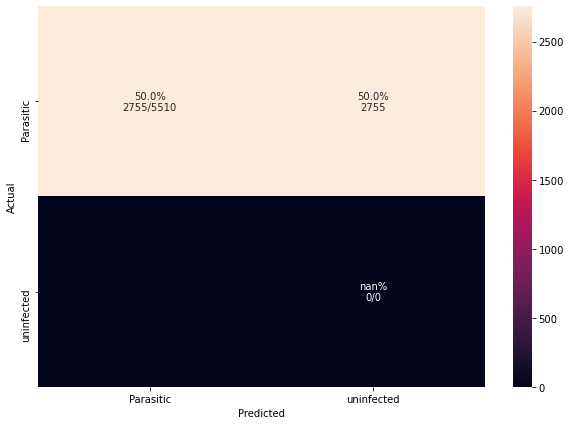

In [34]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import seaborn as sns

matrix_index = ["Parasitic", "uninfected"]

preds = vgg_model.predict(valid_generator)
classpreds = np.argmax(preds, axis=1) # predicted classes 
#y_testclass = np.argmax(valida, axis=1) # true classes

cm = confusion_matrix(predicted_class_indices,label)
print(classification_report(predicted_class_indices,label, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix 
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=annot, fmt='')

# VGG-19 MAE

In [35]:
mae = mean_absolute_error(predicted_class_indices,label)
print('Mean Absolute Error : {}'.format(mae))

Mean Absolute Error : 0.5


# InceptionV3

![architecture](https://miro.medium.com/max/960/1*gqKM5V-uo2sMFFPDS84yJw.png)

In [36]:
inception_model = Sequential()
inception_model.add(tf.keras.applications.InceptionV3(include_top=False, pooling='avg', weights='imagenet', input_shape=(128, 128, 3), classes=2))
inception_model.add(Flatten())
inception_model.add(Dense(64,activation='relu'))
inception_model.add(Dense(1,activation = 'sigmoid'))

inception_model.layers[0].trainable = False
inception_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
inception_model.summary()

87916544/87910968 [==============================] - 1s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                131136    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 21,933,985
Trainable params: 131,201
Non-trainable params: 21,802,784
_________________________________________________________________


In [37]:
inception_history = inception_model.fit_generator(train_generator,
                              steps_per_epoch = len(train_generator),
                              epochs=20,
                              validation_steps = len(valid_generator),
                              validation_data=valid_generator,
                              callbacks = [early_stop]
                                     )

Epoch 1/20
345/345 [==============================] - 46s 134ms/step - loss: 0.2710 - accuracy: 0.8944 - val_loss: 0.2336 - val_accuracy: 0.9049
Epoch 2/20
345/345 [==============================] - 44s 127ms/step - loss: 0.1995 - accuracy: 0.9233 - val_loss: 0.2236 - val_accuracy: 0.9102
Epoch 3/20
345/345 [==============================] - 44s 129ms/step - loss: 0.1850 - accuracy: 0.9290 - val_loss: 0.2241 - val_accuracy: 0.9103
Epoch 4/20
345/345 [==============================] - 45s 129ms/step - loss: 0.1744 - accuracy: 0.9341 - val_loss: 0.2121 - val_accuracy: 0.9149
Epoch 5/20
345/345 [==============================] - 44s 128ms/step - loss: 0.1672 - accuracy: 0.9357 - val_loss: 0.2234 - val_accuracy: 0.9120
Epoch 6/20
345/345 [==============================] - 45s 130ms/step - loss: 0.1618 - accuracy: 0.9367 - val_loss: 0.2163 - val_accuracy: 0.9147


# Save InceptionV3

In [38]:
inception_model_name = 'inceptionv3_malaria_predsmodel.h5'
model.save_weights(inception_model_name)

# InceptionV3 metrics plot

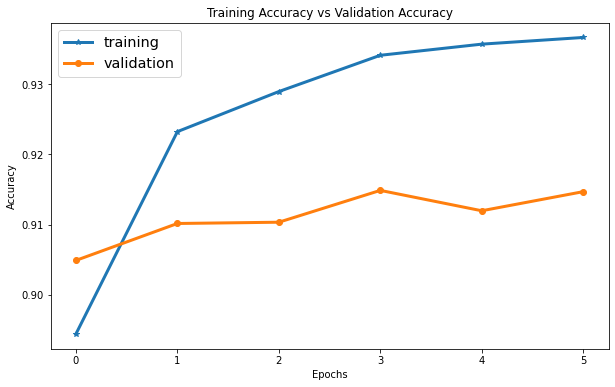

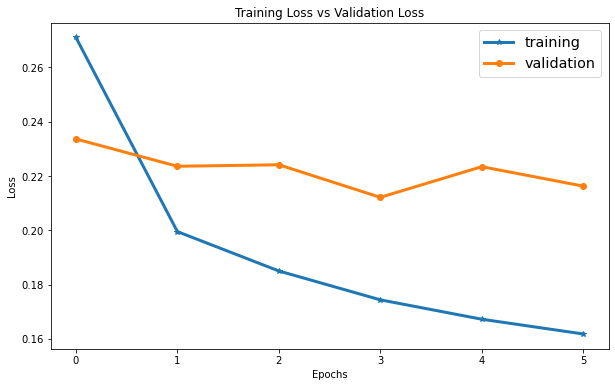

In [39]:
def visualize_training(inception_history, lw = 3):
    plt.figure(figsize=(10,6))
    plt.plot(inception_history.history['accuracy'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(inception_history.history['val_accuracy'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Accuracy vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(fontsize = 'x-large')
    plt.show()

    plt.figure(figsize=(10,6))
    plt.plot(inception_history.history['loss'], label = 'training', marker = '*', linewidth = lw)
    plt.plot(inception_history.history['val_loss'], label = 'validation', marker = 'o', linewidth = lw)
    plt.title('Training Loss vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(fontsize = 'x-large')
    plt.show()
visualize_training(inception_history)

# InceptionV3 predictions

In [40]:
label = valid_generator.classes
pred= inception_model.predict(valid_generator)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (valid_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
vgg_predictions = [labels2[k] for k in predicted_class_indices]

In [41]:
image_path = '../input/cell-images-for-detecting-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'
image = tf.keras.preprocessing.image.load_img(image_path)
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
preds2 = inception_model.predict_classes(input_arr)
preds2

array([[1]], dtype=int32)

In [42]:
rc = roc_curve(predicted_class_indices,label)
cf_matrix = confusion_matrix(predicted_class_indices,label)
cf_report = classification_report(predicted_class_indices,label)
print('Confusion matrix report of the model : \n{}'.format(cf_matrix))

Confusion matrix report of the model : 
[[2755 2755]
 [   0    0]]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
print('Classification report of the VGG19 model : \n{}'.format(cf_report))

Classification report of the VGG19 model : 
              precision    recall  f1-score   support

           0       1.00      0.50      0.67      5510
           1       0.00      0.00      0.00         0

    accuracy                           0.50      5510
   macro avg       0.50      0.25      0.33      5510
weighted avg       1.00      0.50      0.67      5510



# Inception Model Classification Report 

              precision    recall  f1-score   support

   Parasitic       1.00      0.50      0.67      5510
  uninfected       0.00      0.00      0.00         0

    accuracy                           0.50      5510
   macro avg       0.50      0.25      0.33      5510
weighted avg       1.00      0.50      0.67      5510



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


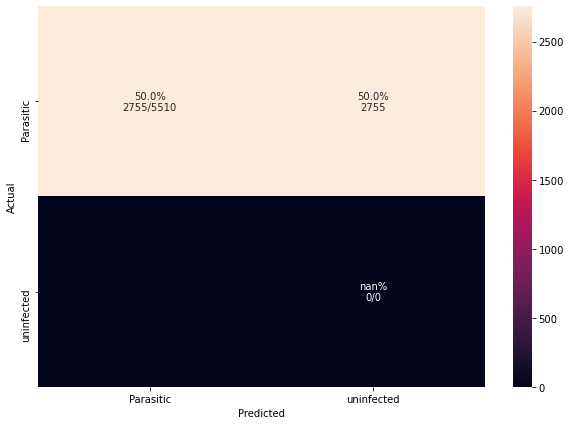

In [44]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, mean_absolute_error
import seaborn as sns

matrix_index = ["Parasitic", "uninfected"]

preds = inception_model.predict(valid_generator)
classpreds = np.argmax(preds, axis=1) # predicted classes 
#y_testclass = np.argmax(valida, axis=1) # true classes

cm = confusion_matrix(predicted_class_indices,label)
print(classification_report(predicted_class_indices,label, target_names=matrix_index))

# Get percentage value for each element of the matrix
cm_sum = np.sum(cm, axis=1, keepdims=True)
cm_perc = cm / cm_sum.astype(float) * 100
annot = np.empty_like(cm).astype(str)
nrows, ncols = cm.shape
for i in range(nrows):
    for j in range(ncols):
        c = cm[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = ''
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)


# Display confusion matrix 
df_cm = pd.DataFrame(cm, index = matrix_index, columns = matrix_index)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_cm, annot=annot, fmt='')

# InceptionNet MAE

In [45]:
mae = mean_absolute_error(predicted_class_indices,label)
print('Mean Absolute Error : {}'.format(mae))

Mean Absolute Error : 0.5


***So probably we may have to do some additional image preprocessing for the model to understand it better, but simple deep learning model purpose has been achieved, so fork it, edit it as per your convinience!!***